# Sheet held to edges by springs

In [1]:
from sympy import *
init_printing()

### Calculate Moment of inertia

In [2]:
x, y, z, rho, A, B, M = symbols('x y z rho A B M', real=True)

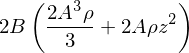

In [3]:
expr = z**2 + y**2
I11 = integrate(integrate(rho*expr, (y, -A, A)), (x, -B, B))
I11

* But then mass is given by $M = 4AB*\rho$, so we can replace $\rho$ with $\rho = M/(4AB)$

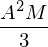

In [4]:
substitutions = {rho: M/(4*A*B), z: 0}
I11 = simplify(I11.subs(substitutions))
I11

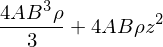

In [5]:
expr = z**2 + x**2
I22 = integrate(integrate(rho*expr, (y, -A, A)), (x, -B, B))
I22

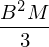

In [6]:
substitutions = {rho: M/(4*A*B), z: 0}
I22 = simplify(I22.subs(substitutions))
I22

### Calculate Kinetic Energies

In [7]:
theta_d, phi_d, z_d, t = symbols('\dot{\\theta} \dot{\\phi} \dot{z} t', real=True)
display(theta_d, phi_d, z_d)

**Note**: Here I am using $\dot{\theta}$, $\dot{\phi}$, and $\dot{z}$ as symbols instead of actual functions. This is just because it is easier for formatting.

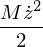

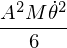

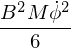

In [8]:
T1 = Rational(1, 2)*M*z_d**2
T2 = Rational(1, 2)*I11*theta_d**2
T3 = Rational(1, 2)*I22*phi_d**2
display(T1, T2, T3)

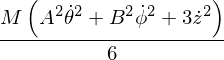

In [9]:
T = simplify(T1 + T2 + T3)
display(T)

### Calculate Potential Energies

In [10]:
k, g = symbols('k g', real=True)
z, theta, phi, omega = symbols('z theta phi omega', real=True)

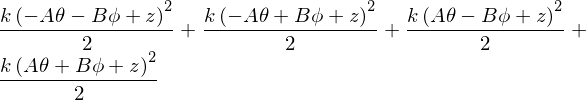

In [11]:
U1 = Rational(1, 2)*k*(z - theta*A - phi*B)**2
U2 = Rational(1, 2)*k*(z + theta*A - phi*B)**2
U3 = Rational(1, 2)*k*(z + theta*A + phi*B)**2
U4 = Rational(1, 2)*k*(z - theta*A + phi*B)**2
U = U1 + U2 + U3 + U4
display(U)
display(simplify(U))

### Solve for $\omega$

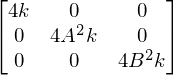

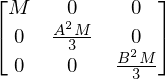

In [26]:
L = 4*k*Matrix([[1, 0, 0], [0, A**2, 0], [0, 0, B**2]])
m_mat = M*Matrix([[1, 0, 0], [0, A**2/3, 0], [0, 0, B**2/3]])
display(L)
display(m_mat)

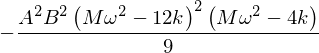

In [27]:
expr = simplify(det(L - omega**2*m_mat))
display(expr)

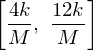

In [28]:
sol = solve(expr, omega**2)
display(sol)

### Find eigenvectors

In [29]:
a1, a2, a3 = symbols('a_1 a_2 a_3')
a = Matrix([a1, a2, a3])

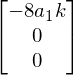

In [30]:
(L - sol[1]*m_mat)*a

In [31]:
b = Matrix([0, 0, 0])
linsolve(((L - sol[1]*m_mat), b), [a1, a2, a3])

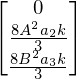

In [32]:
(L - sol[0]*m_mat)*a

In [33]:
linsolve(((L - sol[0]*m_mat), b), [a1, a2, a3])

### Add in kinetic energy from rod

In [20]:
m = symbols('m')

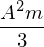

In [21]:
Irod = rho*integrate(y**2 + z**2, (y, -A, A))
Irod = Irod.subs({z: 0, rho: m/(2*A)})
display(Irod)

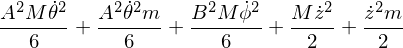

In [22]:
T4 = Rational(1, 2)*m*z_d**2
T5 = Rational(1, 2)*Irod*theta_d**2
Tnew = simplify(T1 + T2 + T3 + T4 + T5)
display(Tnew)

### Find new eigenfrequencies, given updated kinetic energy

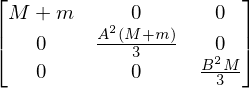

In [23]:
m_new = Matrix([[M + m, 0, 0], 
                [0, A**2/3*(M + m), 0], 
                [0, 0, B**2*M/3]])
display(m_new)

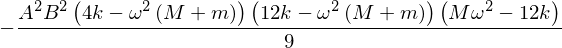

In [24]:
expr_new = simplify(det(L - omega**2*m_new))
display(expr_new)

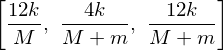

In [25]:
solve(expr_new, omega**2)